<a href="https://colab.research.google.com/github/HARBAL-DEEP-SIHU/MINOR-PROJECT/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.24 ms (started: 2021-04-30 17:43:10 +00:00)


In [2]:
!pip install bing-image-downloader




time: 3.03 s (started: 2021-04-30 17:43:14 +00:00)


In [3]:
!mkdir images

time: 114 ms (started: 2021-04-30 17:43:21 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("Cheetahs",limit=30,output_dir="images",
                    adult_filter_off=True )



[!!]Indexing page: 1

[%] Indexed 21 Images on Page 1.


[%] Downloading Image #1 from https://images.csmonitor.com/csm/2016/12/1020569_1_1227-cheetahs_standard.jpg?alias=standard_900x600
[%] File Downloaded !

[%] Downloading Image #2 from http://img.burrard-lucas.com/zambia/full/cheetahs.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://bloximages.newyork1.vip.townnews.com/richmond.com/content/tncms/assets/v3/editorial/f/0e/f0ed2a0c-48b8-11e3-8f39-001a4bcf6878/527d512a6f1d1.image.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i.ytimg.com/vi/5V451tcH69E/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn0.vox-cdn.com/thumbor/I4yMIAsQSYW3SuBHadTEZCsbhWg=/0x52:1000x615/1600x900/cdn0.vox-cdn.com/uploads/chorus_image/image/38760938/10_2013_EATER_SCENES_CHEETAHS2-66.0.0.JPG
[%] File Downloaded !

[%] Downloading Image #6 from http://saveanimalsfacingextinction.org/wp-content/uploads/2015/06/cheetah_banner.jpg
[%] File Download

In [6]:
downloader.download("Male Lion",limit=30,output_dir="images",
                    adult_filter_off=True )



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from http://img.burrard-lucas.com/kenya/normal/male_lion_portrait.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://media.istockphoto.com/photos/portrait-of-a-beautiful-lion-lion-in-dark-picture-id942169458?k=6&amp;m=942169458&amp;s=170667a&amp;w=0&amp;h=zf0uV2R1gRmm7ljUFAaOv1-bV7P7bblcHIDNsfuLoRA=
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/x/lion-golden-mane-serengeti-tanzania-16152221.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.wallpapersin4k.org/wp-content/uploads/2017/04/Scar-Lion-King-Wallpaper-8.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/x/young-male-lion-4075209.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://editorial.designtaxi.com/news-disney261213/9.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://i.ytimg.com/vi/vybfyhYK-m0/maxresdefault.jpg

In [7]:
#preprocessing
# 1. Resize
# 2. Flatten
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []
DATADIR = "/content/images"
CATEGORIES = ["Cheetahs","Male Lion","ice cream cone"]
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
      img_array = imread(os.path.join(path,img))
      #plt.imshow(img_array)
      img_resized = resize(img_array,(150,150,3)) #normalizes the value from 0 to 1
      flat_data.append(img_resized.flatten())
      images.append(img_resized)
      target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 17.6 s (started: 2021-04-30 17:44:41 +00:00)


In [9]:
flat_data[0]

array([0., 0., 0., ..., 0., 0., 0.])

time: 14 ms (started: 2021-04-30 17:45:25 +00:00)


In [10]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

time: 4.56 ms (started: 2021-04-30 17:45:28 +00:00)


<BarContainer object of 3 artists>

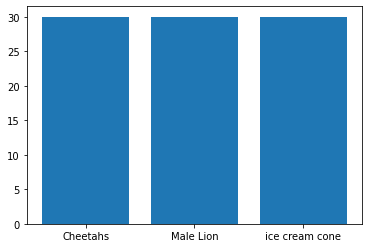

time: 169 ms (started: 2021-04-30 17:45:30 +00:00)


In [11]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [12]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=103)

time: 175 ms (started: 2021-04-30 17:45:35 +00:00)


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C':[1,10,100,1000],'kernel' :['linear'] },
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability= True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 1min 41s (started: 2021-04-30 17:45:39 +00:00)


In [14]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 2, 1, 2, 1])

time: 136 ms (started: 2021-04-30 17:47:30 +00:00)


In [15]:
y_test

array([1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1,
       1, 2, 1, 2, 1])

time: 4.48 ms (started: 2021-04-30 17:47:32 +00:00)


In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.55 ms (started: 2021-04-30 17:47:35 +00:00)


In [17]:
accuracy_score(y_pred,y_test)

0.7037037037037037

time: 6.07 ms (started: 2021-04-30 17:47:37 +00:00)


In [18]:
confusion_matrix(y_pred,y_test)

array([[ 1,  1,  0],
       [ 4, 12,  3],
       [ 0,  0,  6]])

time: 5.82 ms (started: 2021-04-30 17:47:39 +00:00)


In [19]:
# Save the model using pickle library
import pickle
pickle.dump(clf,open('img_model.p' , 'wb'))

time: 33.6 ms (started: 2021-04-30 17:47:44 +00:00)


In [20]:
model = pickle.load(open('img_model.p','rb'))

time: 22.2 ms (started: 2021-04-30 17:47:48 +00:00)


Enter your URLhttps://i.pinimg.com/originals/e7/17/5b/e7175b2c18d828a9737c9527ab67c016.jpg
(600, 960, 3)
 PREDICTED OUTPUT: Cheetahs


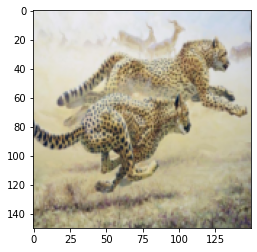

time: 48.9 s (started: 2021-04-30 17:51:43 +00:00)


In [26]:
# Testing a brand new image 
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

In [22]:
!pip install streamlit
!pip install pyngrok
from pyngrok import  ngrok

     |████████████████████████████████| 8.2MB 13.5MB/s 
     |████████████████████████████████| 163kB 55.1MB/s 
     |████████████████████████████████| 81kB 9.4MB/s 
     |████████████████████████████████| 4.2MB 40.2MB/s 
     |████████████████████████████████| 112kB 46.1MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 122kB 49.0MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=3757e5e3368730b144093dee94538fcab421d763df07da419dc60efa43c6bd69
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 16.0MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=277282e7e4bb0aa7e57a1c5f0e6042a0691ca52a1420b444a624fdf96bb01ff2
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
time: 17.5 s (started: 2021-04-30 17:48:01 +00:00)


In [23]:
#Deployment using webApp
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('image classifier')
st.text('upload the image')

model = pickle.load(open('img_model.p','rb'))

upload_file = st.file_uploader('choose an image...',type="jpg")
if uploaded_file is not None:
   img = Image.open(uploaded_file)
   st.image(img,caption="uploaded_image")
   if st.button('PREDICT'):
     CATEGORIES = ["Male Lion","Cheetahs","ice cream cone"]
     st.write('Result...')
     flat_data = []   
     img=np.array(img)
     img_resized = resize(img,(150,150,3))
     
     flat_data.append(img_resized.flatten())
     flat_data = np.array(flat_data)
     
     
     y_out = model.predict(flat_data)
     y_out = CATEGORIES[y_out[0]]
     st.title(f' PREDICTED OUTPUT: {y_out}')
     q = model.predict_proba(flat_data)
     for index, item in enumerate(CATEGORIES):
       st.write(f'{item} : {q[0][index]*100}%')
 


Writing app.py
time: 4.74 ms (started: 2021-04-30 17:48:29 +00:00)


In [24]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://c76bf3d49568.ngrok.io" -> "http://localhost:80">

time: 1.31 s (started: 2021-04-30 17:48:38 +00:00)
